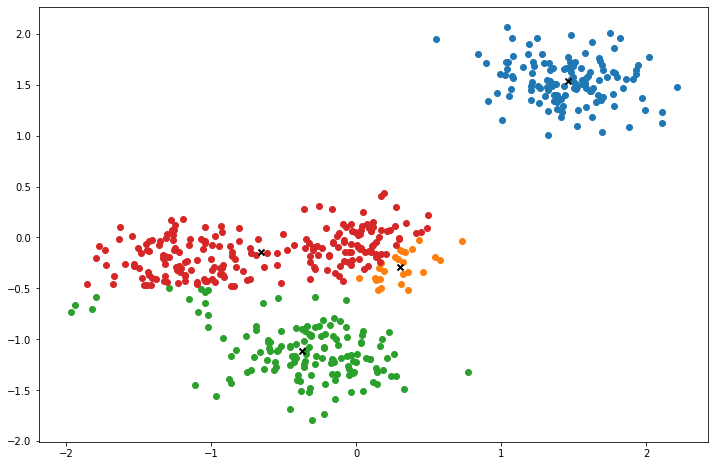

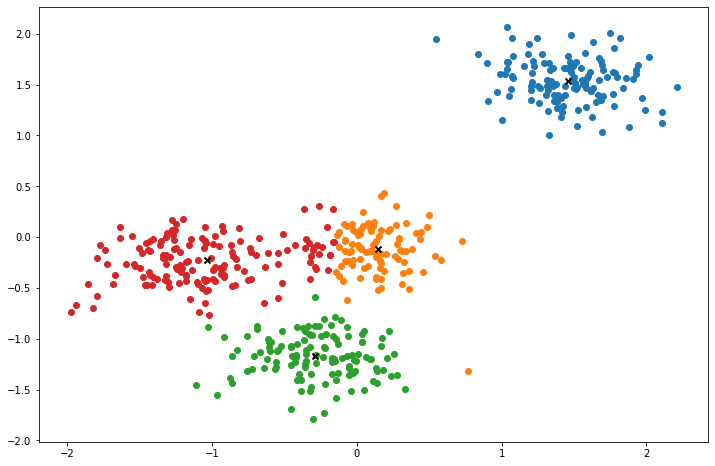

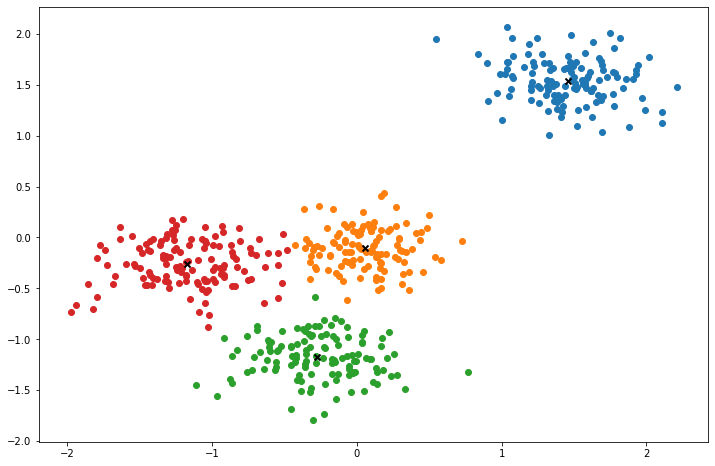

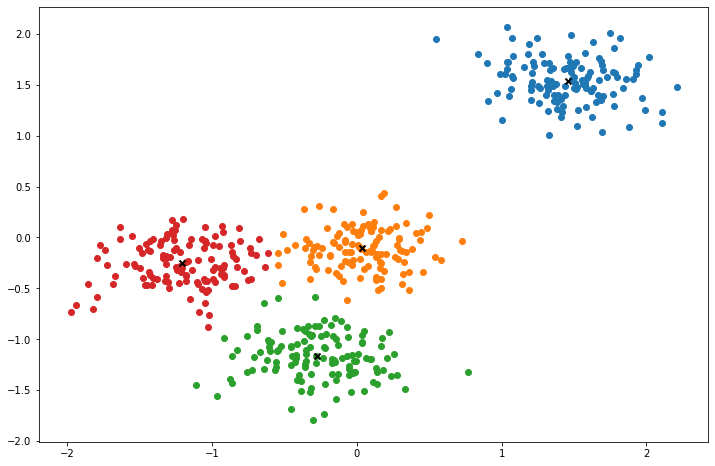

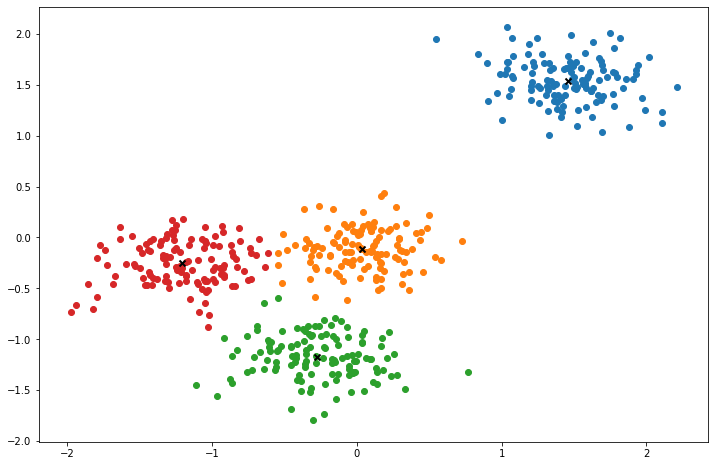

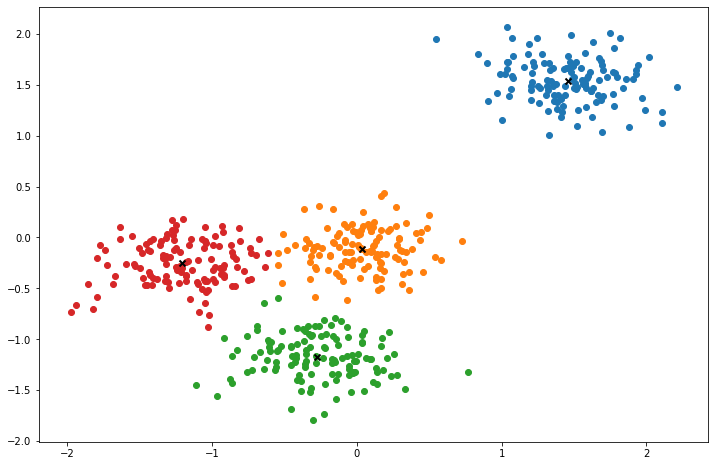

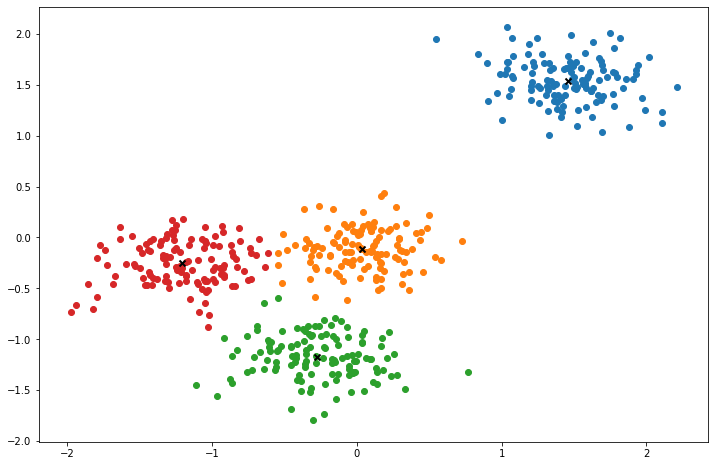

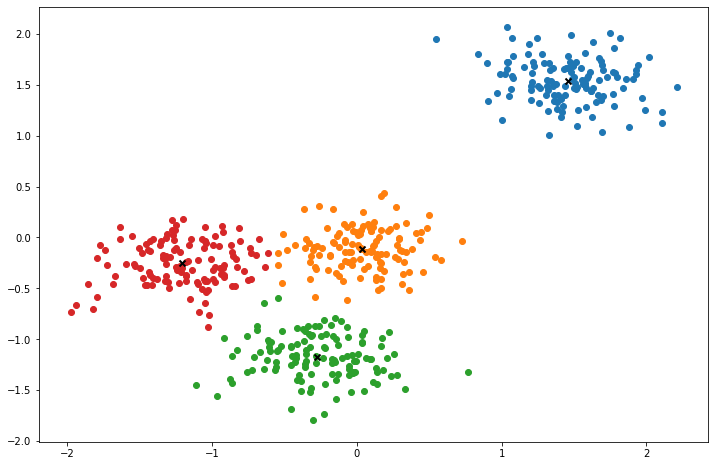

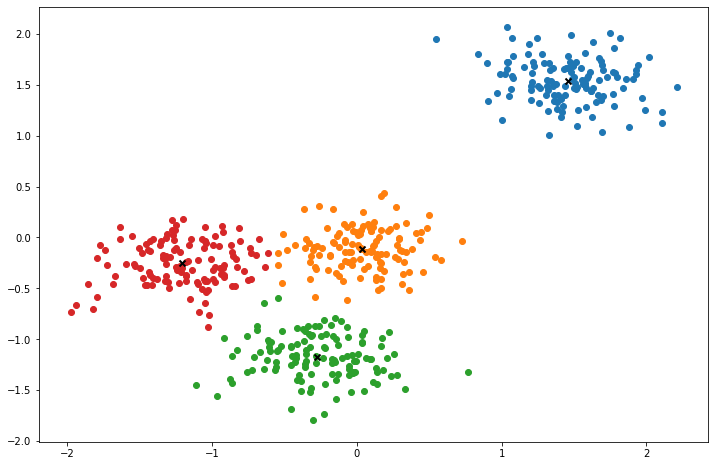

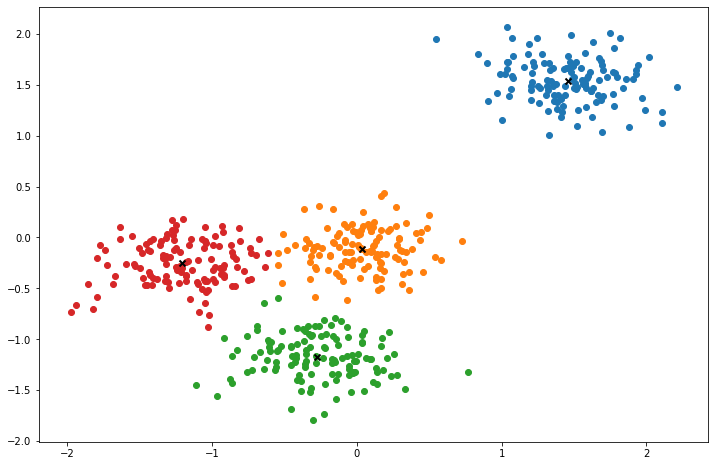

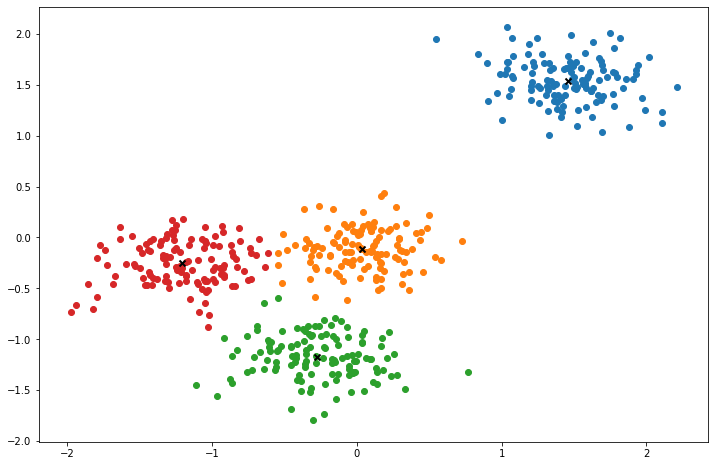

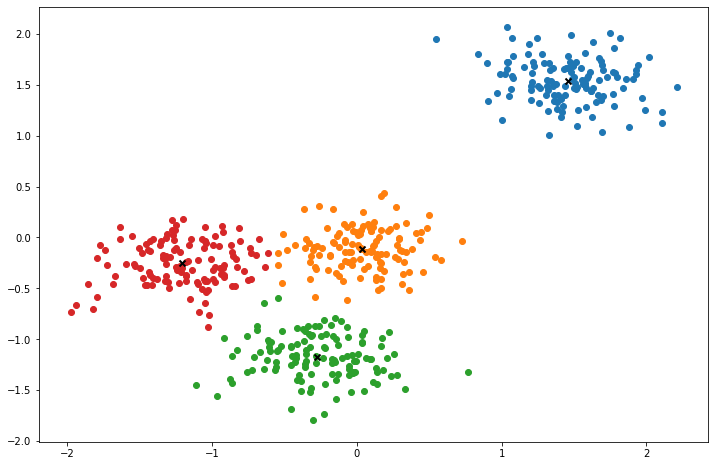

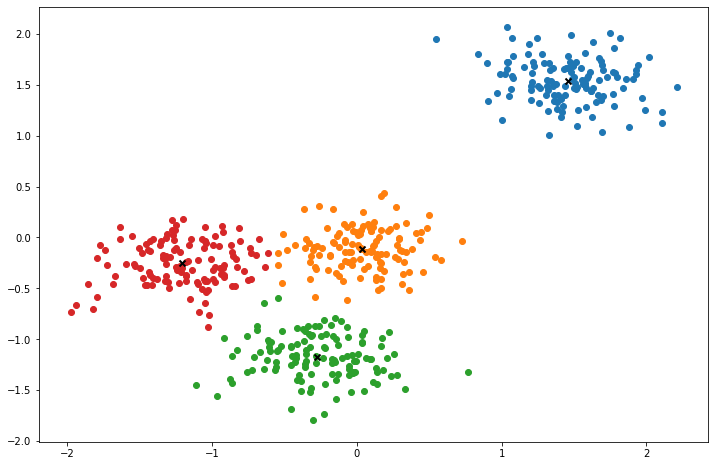

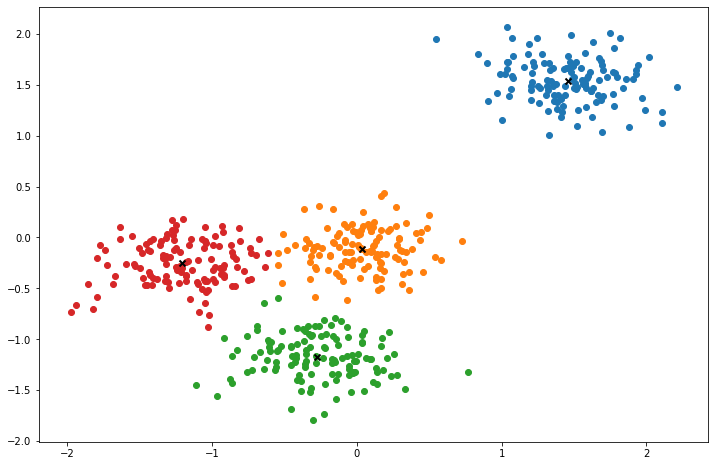

converged with 5 iterations


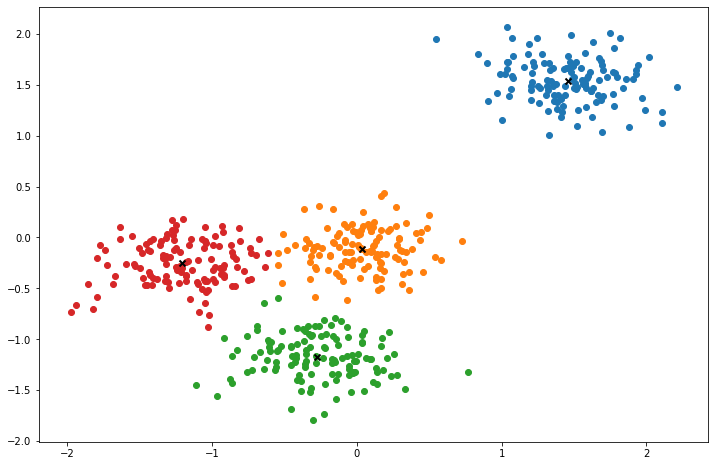

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class KMeans:
    def __init__(self, K=5, max_iters=50, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.centroids = [self.X[index] for index in np.random.choice(X.shape[0], self.K, replace=False)]
        flag_converged = False
        for i in range(self.max_iters):
            self.clusters = self.create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.clusters)
            if self.is_converged(centroids_old, self.centroids) and not flag_converged:
                iterr  = i
                flag_converged = True
            if self.is_converged(centroids_old, self.centroids) and i >=14:
                print("converged with {} iterations".format(iterr))
                break
            if self.plot_steps:
                self.plot()
        return self.get_cluster_labels(self.clusters)

    def get_cluster_labels(self, clusters):
        labels = np.empty(X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            clusters[self.closest_centroid(sample, centroids)].append(index)
        return clusters

    def closest_centroid(self, sample, centroids):
        return np.argmin([euclidean_distance(sample, point) for point in centroids])

    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            centroids[cluster_idx] = np.mean(self.X[cluster], axis=0)
        return centroids

    def is_converged(self, centroids_old, centroids):
        return sum(euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Testing
if __name__ == "__main__":
    df = pd.read_csv("Dataset1.csv")
    X = df.to_numpy()
    k = KMeans(K=4, max_iters=100, plot_steps=True)
    y_pred = k.predict(X)
    k.plot()
